In [7]:
import numpy as np
import matplotlib.pyplot as plt


In [8]:
np.random.seed(0)
X_train = np.random.rand(100, 1)
y_train = (np.random.rand(100, 1) > 0.5).astype(int) 

In [9]:
print(X_train.shape)
print(y_train.shape)

(100, 1)
(100, 1)


In [10]:
print(X_train[0:5])
print(y_train[0:5])

[[0.5488135 ]
 [0.71518937]
 [0.60276338]
 [0.54488318]
 [0.4236548 ]]
[[1]
 [0]
 [1]
 [1]
 [0]]


In [11]:
# Normalize the data
X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)
X_train_normalized = (X_train - X_train_mean) / X_train_std


In [12]:
print(X_train_normalized[0:5])

[[ 0.26368103]
 [ 0.84077065]
 [ 0.45081101]
 [ 0.25004836]
 [-0.17044317]]


In [13]:
print(X_train_mean)
print(X_train_std)

[0.47279384]
[0.28830161]


In [14]:
# Activation functions
def relu(Z):
    return np.maximum(0, Z)

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

In [15]:
# Forward propagation function (same for both models)
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1  # Hidden layer linear step
    A1 = relu(Z1)           # Hidden layer activation
    Z2 = np.dot(A1, W2) + b2 # Output layer linear step
    A2 = sigmoid(Z2)        # Output layer activation (probability)
    return A2


In [16]:
def predict(X, W1, b1, W2, b2):
    probabilities = forward_propagation(X, W1, b1, W2, b2)
    predictions = (probabilities > 0.5).astype(int)
    return predictions

In [17]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100

In [18]:
# @Forward Propagation: 
# Initialize weights and biases (randomly)
W1_model1 = np.random.randn(X_train_normalized.shape[1], 4) * 0.01
b1_model1 = np.zeros((1, 4))
W2_model1 = np.random.randn(4, 1) * 0.01
b2_model1 = np.zeros((1, 1))

# Forward pass only (without learning)
y_pred_model1 = predict(X_train_normalized, W1_model1, b1_model1, W2_model1, b2_model1)
acc_model1 = accuracy(y_train, y_pred_model1)


In [101]:
# @Forward Propagation with Backpropagation (Learning)
W1_model2 = np.random.randn(X_train_normalized.shape[1], 4) * 0.01
b1_model2 = np.zeros((1, 4))
W2_model2 = np.random.randn(4, 1) * 0.01
b2_model2 = np.zeros((1, 1))

# Hyperparameters for backpropagation
learning_rate = 0.1
num_epochs = 50000
losses = []  # To track loss for each epoch

# Backpropagation function
def backpropagation(X, y, W1, b1, W2, b2, learning_rate):
    m = X.shape[0]
    
    # Forward pass
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    
    # Compute the loss (binary cross-entropy)
    cost = -(1/m) * np.sum(y * np.log(A2) + (1 - y) * np.log(1 - A2))
    
    # Backpropagation (compute gradients)
    dZ2 = A2 - y
    dW2 = (1/m) * np.dot(A1.T, dZ2)
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
    
    dZ1 = np.dot(dZ2, W2.T) * (A1 > 0)  # Derivative of ReLU
    dW1 = (1/m) * np.dot(X.T, dZ1)
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
    
    # Update weights and biases using gradient descent
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    return W1, b1, W2, b2, cost

In [102]:
y_pred_model2 = predict(X_train_normalized, W1_model2, b1_model2, W2_model2, b2_model2)
acc_model2 = accuracy(y_train, y_pred_model2)

In [103]:
# using Backpropagation with Loss Tracking
for epoch in range(num_epochs):
    W1_model2, b1_model2, W2_model2, b2_model2, cost = backpropagation(
        X_train_normalized, y_train, W1_model2, b1_model2, W2_model2, b2_model2, learning_rate
    )
    if epoch % 100 == 0:  # Print loss every 100 epochs
        print(f"Epoch {epoch}: Loss = {cost:.4f}")
    losses.append(cost)

Epoch 0: Loss = 0.6931
Epoch 100: Loss = 0.6834
Epoch 200: Loss = 0.6833
Epoch 300: Loss = 0.6833
Epoch 400: Loss = 0.6833
Epoch 500: Loss = 0.6833
Epoch 600: Loss = 0.6833
Epoch 700: Loss = 0.6833
Epoch 800: Loss = 0.6833
Epoch 900: Loss = 0.6833
Epoch 1000: Loss = 0.6833
Epoch 1100: Loss = 0.6832
Epoch 1200: Loss = 0.6832
Epoch 1300: Loss = 0.6831
Epoch 1400: Loss = 0.6830
Epoch 1500: Loss = 0.6829
Epoch 1600: Loss = 0.6827
Epoch 1700: Loss = 0.6824
Epoch 1800: Loss = 0.6820
Epoch 1900: Loss = 0.6814
Epoch 2000: Loss = 0.6806
Epoch 2100: Loss = 0.6796
Epoch 2200: Loss = 0.6785
Epoch 2300: Loss = 0.6773
Epoch 2400: Loss = 0.6760
Epoch 2500: Loss = 0.6747
Epoch 2600: Loss = 0.6735
Epoch 2700: Loss = 0.6725
Epoch 2800: Loss = 0.6717
Epoch 2900: Loss = 0.6711
Epoch 3000: Loss = 0.6707
Epoch 3100: Loss = 0.6704
Epoch 3200: Loss = 0.6702
Epoch 3300: Loss = 0.6701
Epoch 3400: Loss = 0.6700
Epoch 3500: Loss = 0.6700
Epoch 3600: Loss = 0.6699
Epoch 3700: Loss = 0.6699
Epoch 3800: Loss = 0.669

In [104]:

# Make Predictions for (With Backpropagation)
y_pred_model2 = predict(X_train_normalized, W1_model2, b1_model2, W2_model2, b2_model2)
acc_model2 = accuracy(y_train, y_pred_model2)



Model 1 (Forward Propagation Only) - Accuracy: 46.00%
Model 2 (With Backpropagation) - Accuracy: 57.00%


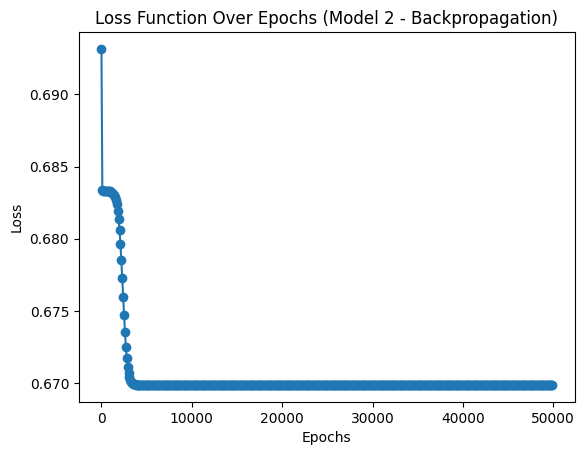

In [105]:
print("\nModel 1 (Forward Propagation Only) - Accuracy: {:.2f}%".format(acc_model1))
print("Model 2 (With Backpropagation) - Accuracy: {:.2f}%".format(acc_model2))

# Loss Visualization for Model 2
plt.plot(range(0, num_epochs, 100), losses[::100], marker='o')
plt.title("Loss Function Over Epochs (Model 2 - Backpropagation)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()